In [15]:
import numpy as np
import gzip
import pickle
import sys
import copy
import os.path
from copy import deepcopy

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# IBP random

# CL2

## CL3

# Predictive Entropy mean + Coresets

In [35]:
with open('results/split_mnist_split_random_cl3_l1_coreset_pe_full_vcl.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [36]:
d['vcl_baselines'][5].shape

(2, 5, 5, 5)

In [43]:
cl3 = True
ind = 1 if cl3 else 0
ibp_acc = d['vcl_ibp']
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc[ind, :, :, :], 0)
_vcl_result_h5 = np.mean(vcl_result_h5[ind,:,:,:], 0)
_vcl_result_h50 = np.mean(vcl_result_h50[ind,:,:,:], 0)
_vcl_result_h100 = np.mean(vcl_result_h100[ind,:,:,:], 0)
__ibp_acc = np.nanmean(ibp_acc[ind,:,:,:], (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5[ind,:,:,:], (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50[ind,:,:,:], (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100[ind,:,:,:], (0,1))

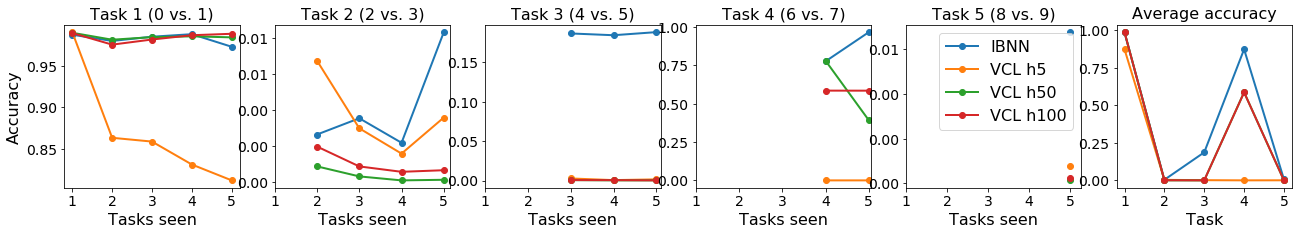

In [44]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [45]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc[ind,:,:,:]), 
                                                  np.nanmean(np.nanstd(ibp_acc[ind:,:,:], 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5[ind,:,:,:]), 
                                                     np.nanmean(np.nanstd(vcl_result_h5[ind,:,:,:], 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50[ind,:,:,:]),
                                                      np.nanmean(np.nanstd(vcl_result_h50[ind,:,:,:], 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100[ind, :,:,:]),
                                                       np.nanmean(np.nanstd(vcl_result_h100[ind,:,:,:], 0))))

Overall accuracies IBP: 0.4826045724331954 pm 0.0
Overall accuracies VCL h5: 0.29170717874778657 pm 0.023966180496871478
Overall accuracies VCL h50: 0.4066574987691421 pm 0.05967615895001379
Overall accuracies VCL h100: 0.4065274640316863 pm 0.0654709040793582


## Optimism Predictive Entropy full

In [2]:
with open('results/split_mnist_split_random_l1_cl3_opt.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [3]:
ibp_acc = d['vcl_ibp']
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

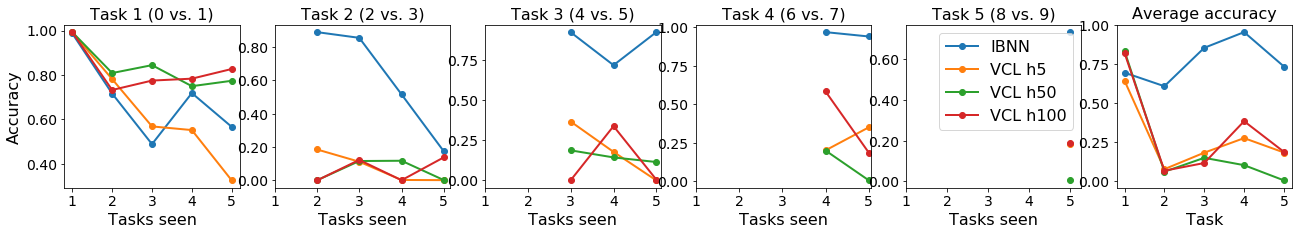

In [4]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [5]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.7405325257093176 pm 0.21010784824466885
Overall accuracies VCL h5: 0.31952059388593973 pm 0.2638550379990343
Overall accuracies VCL h50: 0.3369913779180637 pm 0.19169509098757573
Overall accuracies VCL h100: 0.37787716544062466 pm 0.18909482847032638


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


## Optimism with Predictive entropy and batch_pred_ent=2000

In [19]:
with open('results/split_mnist_split_random_l1_cl3_batch_pred_ent.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [20]:
ibp_acc = d['vcl_ibp']
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

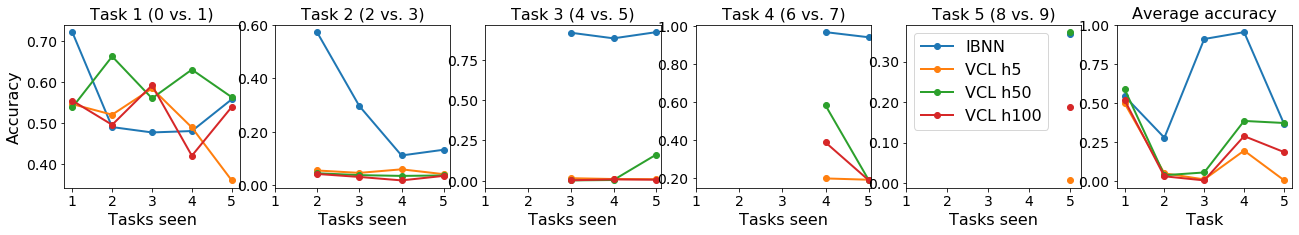

In [21]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [22]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.589587319317919 pm 0.1424644623102806
Overall accuracies VCL h5: 0.20863500265454302 pm 0.1177944142753691
Overall accuracies VCL h50: 0.2942830666618344 pm 0.18592670092613803
Overall accuracies VCL h100: 0.23348680227138174 pm 0.1494618055794703


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


# Optimism with pred ent and batch=1500

In [6]:
with open('results/split_mnist_split_random_l1_cl3_pred_ent_opt_be1500.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [7]:
ibp_acc = d['vcl_ibp']
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

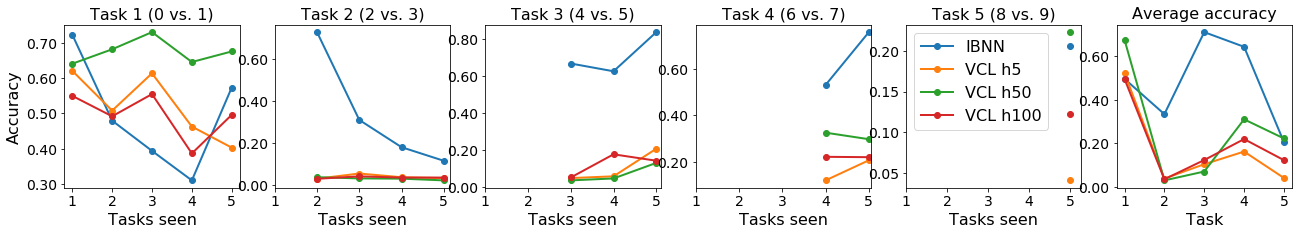

In [8]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [9]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.49601671642327344 pm 0.20988403516693965
Overall accuracies VCL h5: 0.22953944454430106 pm 0.13836739207921828
Overall accuracies VCL h50: 0.30357896847964183 pm 0.15441898515608382
Overall accuracies VCL h100: 0.2369470861279236 pm 0.15181546534884033


## Sharpe with predictive Entropy

In [2]:
with open('results/split_mnist_split_random_l1_cl3_sharpe_pe.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [3]:
ibp_acc = d['vcl_ibp']
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

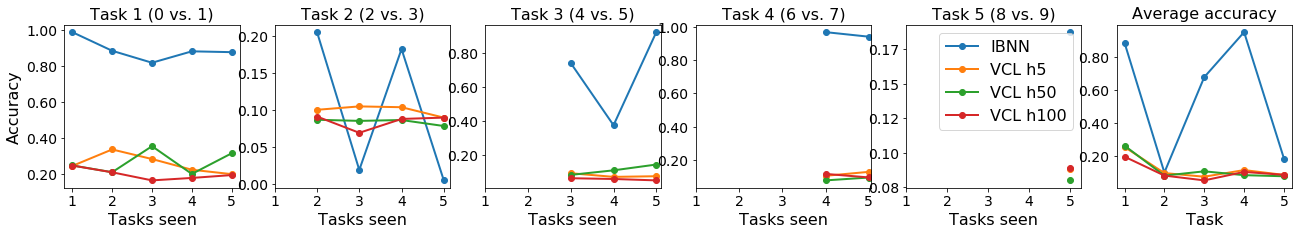

In [4]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [5]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.5995091224004258 pm 0.14663098849470105
Overall accuracies VCL h5: 0.14918242744725363 pm 0.049177833281951765
Overall accuracies VCL h50: 0.14963388791304708 pm 0.04740712822646291
Overall accuracies VCL h100: 0.11966046447689803 pm 0.04092773272547741


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


## mutual info mean

In [2]:
with open('results/split_mnist_split_random_l1_cl3_mi_mean.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [3]:
ibp_acc = d['vcl_ibp']
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

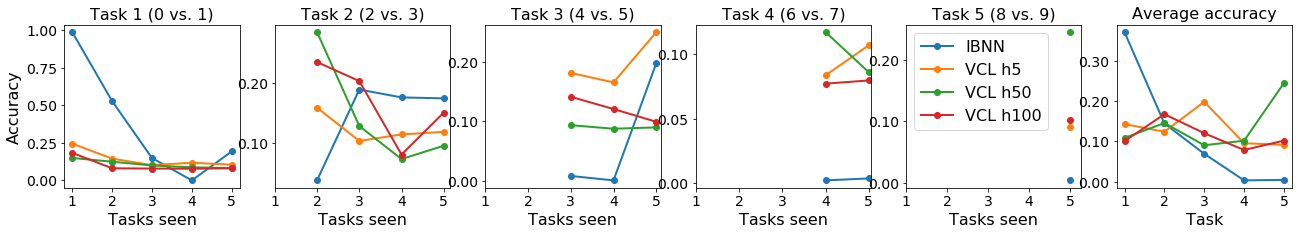

In [4]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_l1_sh.pdf", bbox_inches='tight')
fig.show()

## mutual information sharpe

In [5]:
with open('results/split_mnist_split_random_l1_cl3_mi_sharpe.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [6]:
ibp_acc = d['vcl_ibp']
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

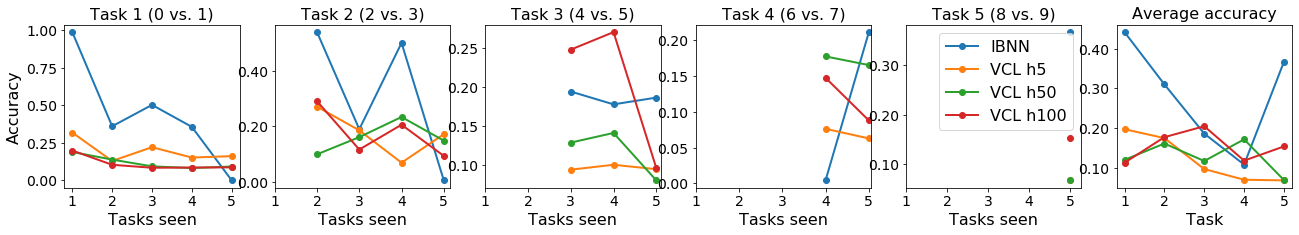

In [7]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_l1_sh.pdf", bbox_inches='tight')
fig.show()

## mutual information optimism

In [14]:
with open('results/split_mnist_split_random_l1_cl3_mi_optimism.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [17]:
d['vcl_ibp'].shape

(5, 5, 5)

In [15]:
ibp_acc = d['vcl_ibp']
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

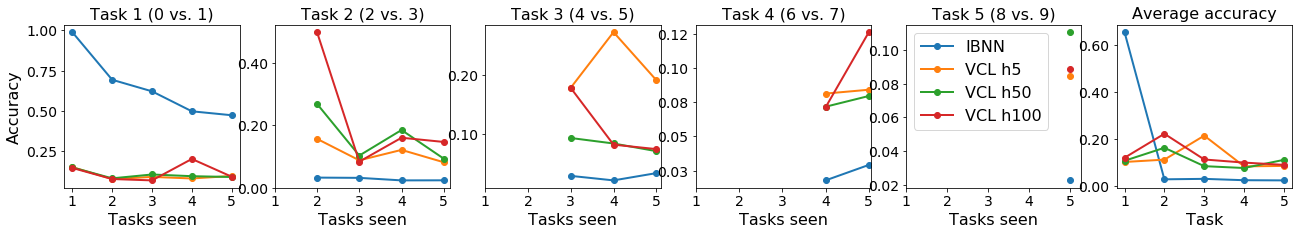

In [16]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_l1_sh.pdf", bbox_inches='tight')
fig.show()